# Texture Analysis of Skin Cancer Image

#### Name: Diego da Costa Bernardo
#### USP Number: 11362565
#### Course Code: SCC5830 - Image Processing Turma01_1Sem_2020
#### Professor: Moacir A. Ponti
#### ICMC - São Carlos

This project aims to develop an analise that will identify different patterns in skin lesions applying texture analysis techniques of image processing in images of skin. 

This project intend show how to apply image processing in medical imaging field.

Below we have examples of input images. Our system will receive images with skin lesions and will analise texture in order to identify patterns that differentiate malign and benign lesions.

The images used in this project are obtained from SIIM-ISIC Melanoma Classification on Kaggle Platform. 
[https://www.kaggle.com/c/siim-isic-melanoma-classification ]


### Main objective of the project
The goal of this project is identify texture patterns that we can use to differentiate benign and malign skin lesions.

# First attempt - Local Binary Patterns

### Input images description

* We will analyze 6 images from 3 different peoples.
* Each person had 2 images, 1 malign and other benign.
* The images are from de same part of the body, malign and benign, in order to avoid different patterns due to difference of body part.
* The image are in jpg format and have different size

### Steps to reach the goal

* The first step will be resize all the images to the same size in order to avoid differences due to the size of the image.
* We will analyze the image using texture analyses techniques, like Local Binary Patterns and euclidean distance between malign and benign images.
* We will analyze the imagens with colors and grayscale as well as different color system, like HSV.

In [2]:
# Imports

import numpy as np
import imageio
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib as mpl

from skimage import feature
import mahotas as mt
import cv2

In [17]:
# Read Images

# p1_b --> Person 1 Benign
# p1_m --> Person 1 Malign

# p2_b --> Person 2 Benign
# p2_m --> Person 2 Malign

# p3_b --> Person 3 Benign
# p3_m --> Person 3 Malign

img_p1_b = imageio.imread("images/p1_b.jpg")
img_p1_m = imageio.imread("images/p1_m.jpg")
img_p2_b = imageio.imread("images/p2_b.jpg")
img_p2_m = imageio.imread("images/p2_m.jpg")
img_p3_b = imageio.imread("images/p3_b.jpg")
img_p3_m = imageio.imread("images/p3_m.jpg")

In [4]:
# Resize Image
img_p1_b = resize(img_p1_b, (1500,1500))
img_p1_m = resize(img_p1_m, (1500,1500))
img_p2_b = resize(img_p2_b, (1500,1500))
img_p2_m = resize(img_p2_m, (1500,1500))
img_p3_b = resize(img_p3_b, (1500,1500))
img_p3_m = resize(img_p3_m, (1500,1500))

Below we have examples of input images. 

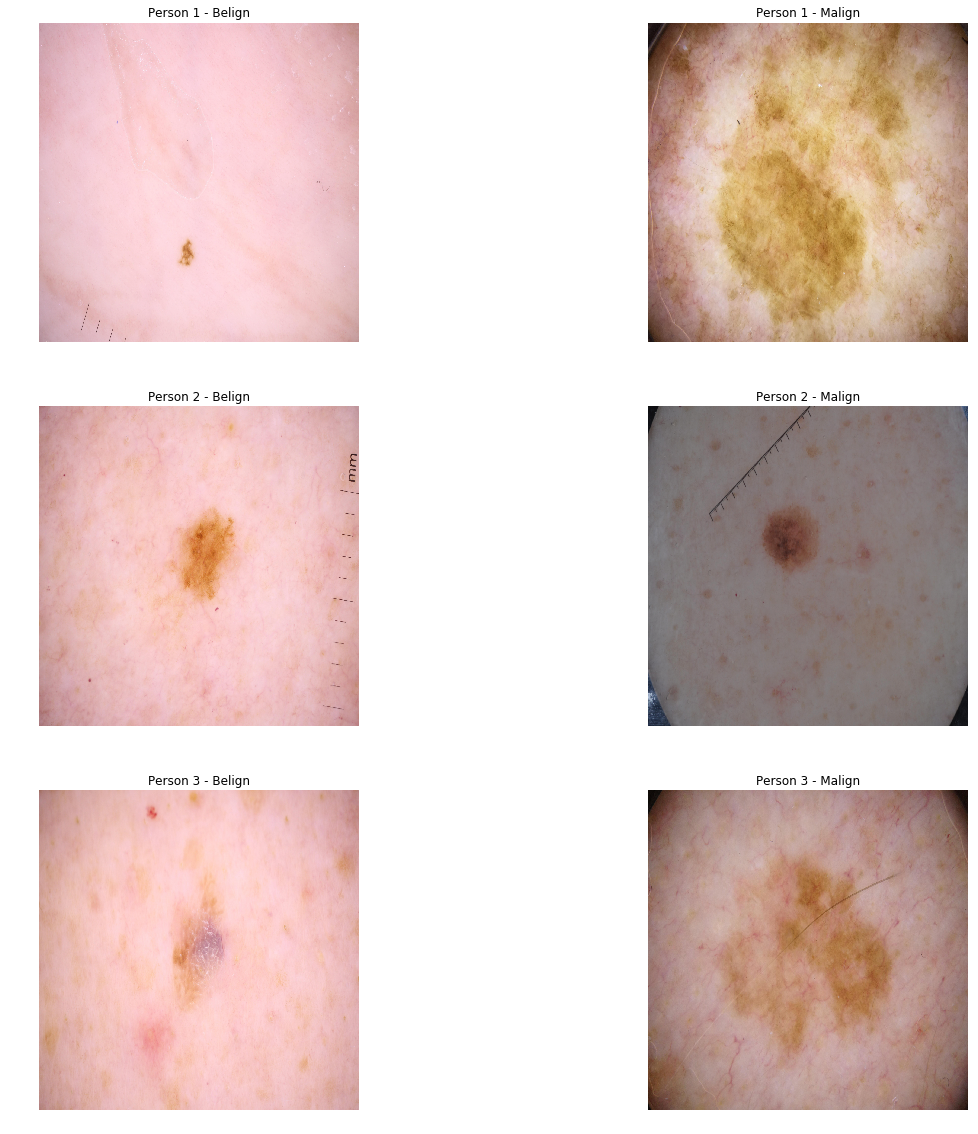

In [5]:
# Show Images
plt.figure(figsize=(20,20))
plt.subplot(321); plt.imshow(img_p1_b); plt.title('Person 1 - Belign'); plt.axis('off')
plt.subplot(322); plt.imshow(img_p1_m); plt.title('Person 1 - Malign'); plt.axis('off')
plt.subplot(323); plt.imshow(img_p2_b); plt.title('Person 2 - Belign'); plt.axis('off')
plt.subplot(324); plt.imshow(img_p2_m); plt.title('Person 2 - Malign'); plt.axis('off')
plt.subplot(325); plt.imshow(img_p3_b); plt.title('Person 3 - Belign'); plt.axis('off')
plt.subplot(326); plt.imshow(img_p3_m); plt.title('Person 3 - Malign'); plt.axis('off')
plt.show()

In [6]:
# Shape Images 
print(img_p1_b.shape)
print(img_p1_m.shape)
print(img_p2_b.shape)
print(img_p2_m.shape)
print(img_p3_b.shape)
print(img_p3_m.shape)

(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)


### Local Binary Patterns and euclidean distance between malign and benign images.

In [7]:
def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    #img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    #i_min = np.min(img)
    #i_max = np.max(img)
    #if (i_max - i_min != 0):
    #    img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

In [8]:
lbp_p1_b = lbp_features(img_p1_b,1,8)
lbp_p1_m = lbp_features(img_p1_m,1,8)
lbp_p2_b = lbp_features(img_p2_b,1,8)
lbp_p2_m = lbp_features(img_p2_m,1,8)
lbp_p3_b = lbp_features(img_p3_b,1,8)
lbp_p3_m = lbp_features(img_p3_m,1,8)

d_1b_2b = Euclidean_distance(lbp_p1_b, lbp_p2_b)
d_1b_3b = Euclidean_distance(lbp_p1_b, lbp_p3_b)
d_1b_1m = Euclidean_distance(lbp_p1_b, lbp_p1_m)
d_1b_2m = Euclidean_distance(lbp_p1_b, lbp_p2_m)
d_1b_3m = Euclidean_distance(lbp_p1_b, lbp_p3_m)

### First Result

As we can see, there is a relationship between Belign and Malign images using Local Binary Patter and Euclidean Distance.

* Distance Benign: < 0.05
* Distance Malign: > 0.05

Text(0.5,1,'P3.Malign : 0.081347116')

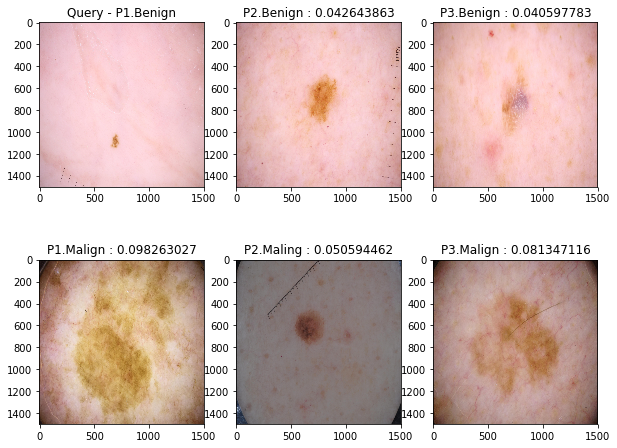

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img_p1_b); plt.title('Query - P1.Benign')
plt.subplot(232); plt.imshow(img_p2_b); plt.title('P2.Benign : %.9f' % d_1b_2b)
plt.subplot(233); plt.imshow(img_p3_b); plt.title('P3.Benign : %.9f' % d_1b_3b)
plt.subplot(234); plt.imshow(img_p1_m); plt.title('P1.Malign : %.9f' % d_1b_1m)
plt.subplot(235); plt.imshow(img_p2_m); plt.title('P2.Maling : %.9f' % d_1b_2m)
plt.subplot(236); plt.imshow(img_p3_m); plt.title('P3.Malign : %.9f' % d_1b_3m)

(-0.8900000000000001, 9.89, 0.0, 0.19451646666658023)

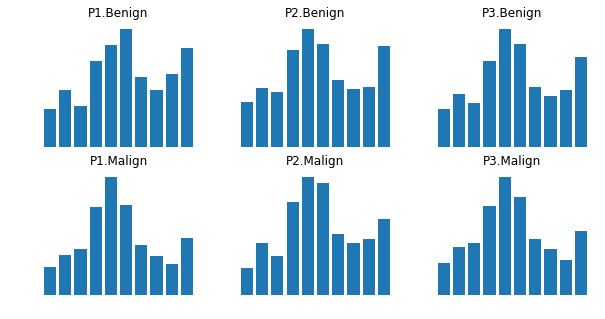

In [10]:
vals = range(len(lbp_p1_b))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp_p1_b); plt.title('P1.Benign'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp_p2_b); plt.title('P2.Benign'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp_p3_b); plt.title('P3.Benign'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp_p1_m); plt.title('P1.Malign'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp_p2_m); plt.title('P2.Malign'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp_p3_m); plt.title('P3.Malign'); plt.axis('off')

### Local Binary Patterns and euclidean distance in HSV color system.

In [11]:
# Get HSV Images
hsv_p1_b = mpl.colors.rgb_to_hsv(img_p1_b)
hsv_p1_m = mpl.colors.rgb_to_hsv(img_p1_m)
hsv_p2_b = mpl.colors.rgb_to_hsv(img_p2_b)
hsv_p2_m = mpl.colors.rgb_to_hsv(img_p2_m)
hsv_p3_b = mpl.colors.rgb_to_hsv(img_p3_b)
hsv_p3_m = mpl.colors.rgb_to_hsv(img_p3_m)

lbp_p1_b = lbp_features(hsv_p1_b,1,8)
lbp_p1_m = lbp_features(hsv_p1_m,1,8)
lbp_p2_b = lbp_features(hsv_p2_b,1,8)
lbp_p2_m = lbp_features(hsv_p2_m,1,8)
lbp_p3_b = lbp_features(hsv_p3_b,1,8)
lbp_p3_m = lbp_features(hsv_p3_m,1,8)

d_1b_2b = Euclidean_distance(lbp_p1_b, lbp_p2_b)
d_1b_3b = Euclidean_distance(lbp_p1_b, lbp_p3_b)
d_1b_1m = Euclidean_distance(lbp_p1_b, lbp_p1_m)
d_1b_2m = Euclidean_distance(lbp_p1_b, lbp_p2_m)
d_1b_3m = Euclidean_distance(lbp_p1_b, lbp_p3_m)

### Result - HSV

Using HSV color system is possible see the same pattern in euclidean distance with Local Binary Pattern.
Notice that the distance using HSV color system is more widespread than RGB.

* Distance Benign: < 0.05
* Distance Malign: > 0.05

Text(0.5,1,'P3.Malign : 0.059057145')

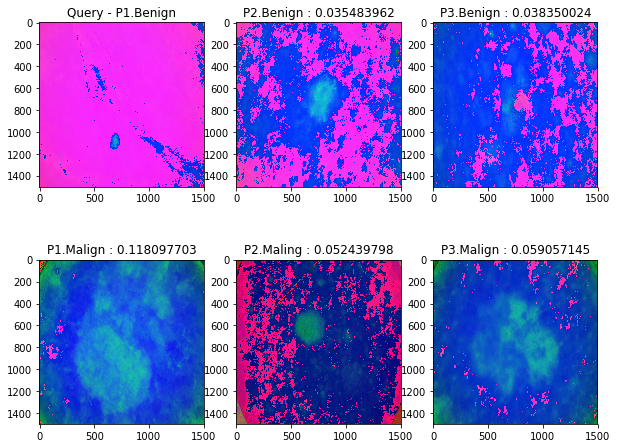

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(hsv_p1_b); plt.title('Query - P1.Benign')
plt.subplot(232); plt.imshow(hsv_p2_b); plt.title('P2.Benign : %.9f' % d_1b_2b)
plt.subplot(233); plt.imshow(hsv_p3_b); plt.title('P3.Benign : %.9f' % d_1b_3b)
plt.subplot(234); plt.imshow(hsv_p1_m); plt.title('P1.Malign : %.9f' % d_1b_1m)
plt.subplot(235); plt.imshow(hsv_p2_m); plt.title('P2.Maling : %.9f' % d_1b_2m)
plt.subplot(236); plt.imshow(hsv_p3_m); plt.title('P3.Malign : %.9f' % d_1b_3m)

(-0.8900000000000001, 9.89, 0.0, 0.18647579999991715)

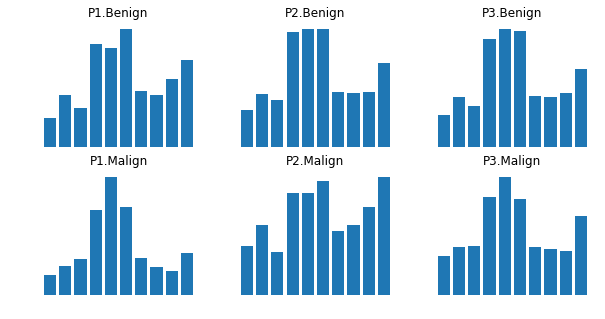

In [13]:
vals = range(len(lbp_p1_b))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp_p1_b); plt.title('P1.Benign'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp_p2_b); plt.title('P2.Benign'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp_p3_b); plt.title('P3.Benign'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp_p1_m); plt.title('P1.Malign'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp_p2_m); plt.title('P2.Malign'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp_p3_m); plt.title('P3.Malign'); plt.axis('off')

# Conclusion - First Attempt

Pros:
* There are a relationship between Benign and Malign Skin lesions when we check the euclidean distance of these images using Local Binary Patterns

Cons:
* This relationship is trustworthy when the analyzed images are from the same person and the same part of the body.
* So, when we apply this same algorithm into a lot of different skin lesions, the result is poor.

# Second Attempt - Haralick

### Input images description

For this attempt we used all images available from SIIM-ISIC Melanoma Classification on Kaggle Platform. 
[https://www.kaggle.com/c/siim-isic-melanoma-classification ]

* Train the model: 33.126 images
* Test the model: 10.928 Images

### Steps to reach the goal

In that attempt we will use Haralick technique in order to obtain texture features of skin lesions

* Get features from images using Haralick
* Train a model using this obtained features with LightGBM library in order to identify a pattern between malign and benign features
* Identify the most importante feature
* Test the result of the model

In [20]:
import cv2
import numpy as np
import pandas as pd
import os
import mahotas as mt
import imageio

In [15]:
# function to extract haralick textures from an image
def extract_features_haralick(image):
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # calculate haralick texture features for 4 types of adjacency
    textures = mt.features.haralick(gray)

    # take the mean of it and return it
    #ht_mean  = textures.mean(axis=0)
    return textures

In [18]:
hal_p1_b = extract_features_haralick(img_p1_b)
hal_p1_m = extract_features_haralick(img_p1_m)
hal_p2_b = extract_features_haralick(img_p2_b)
hal_p2_m = extract_features_haralick(img_p2_m)
hal_p3_b = extract_features_haralick(img_p3_b)
hal_p3_m = extract_features_haralick(img_p3_m)

### Observation

Looking at the histogram below, we can see the feature of index 5 is always different in benign and malign images. 

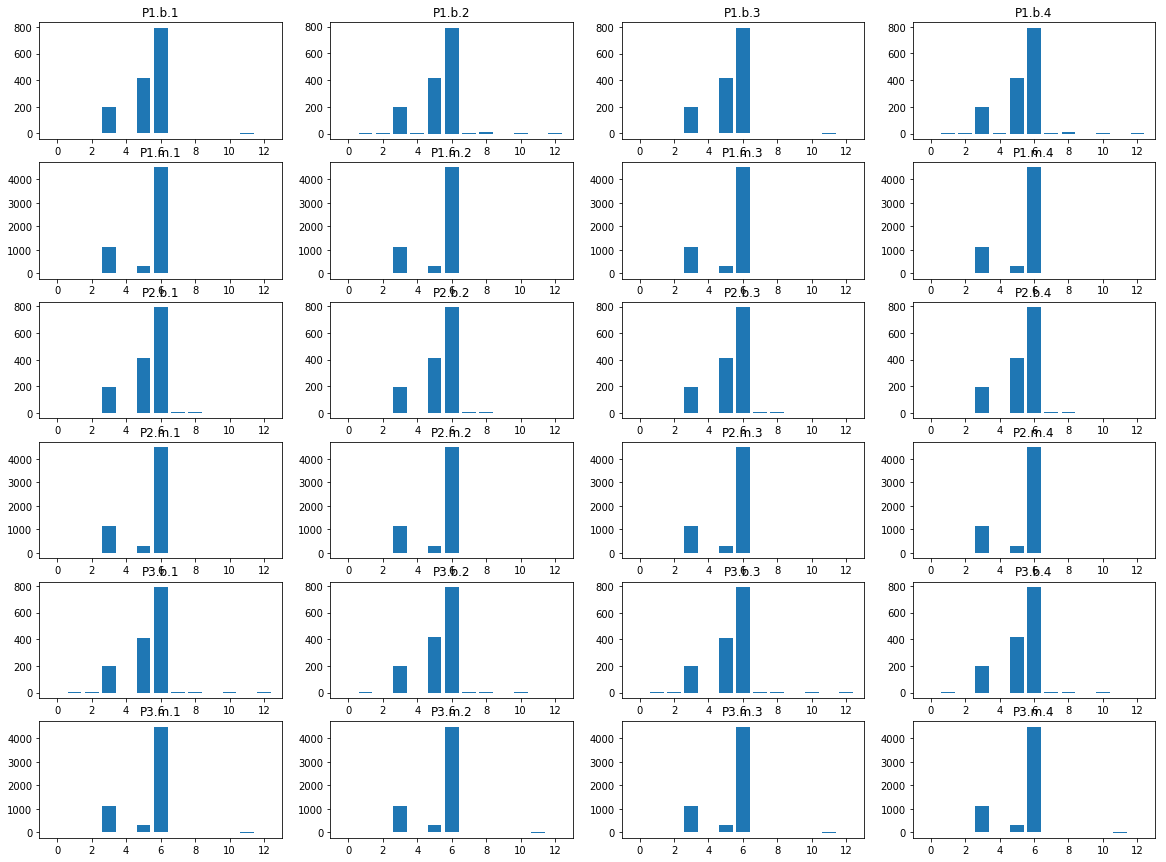

In [19]:
features_p1_b = hal_p1_b
features_p1_m = hal_p1_m
features_p2_b = hal_p2_b
features_p2_m = hal_p2_m
features_p3_b = hal_p3_b
features_p3_m = hal_p3_m


vals = range(len(features_p1_b[0]))
plt.figure(figsize=(20,15))

# Person 1 . Benign
plt.subplot(641); plt.bar(vals,features_p1_b[0]); plt.title('P1.b.1');
plt.subplot(642); plt.bar(vals,features_p1_b[1]); plt.title('P1.b.2');
plt.subplot(643); plt.bar(vals,features_p1_b[2]); plt.title('P1.b.3');
plt.subplot(644); plt.bar(vals,features_p1_b[3]); plt.title('P1.b.4');

# Person 1 . Malign
plt.subplot(645); plt.bar(vals,features_p1_m[0]); plt.title('P1.m.1');
plt.subplot(646); plt.bar(vals,features_p1_m[1]); plt.title('P1.m.2');
plt.subplot(647); plt.bar(vals,features_p1_m[2]); plt.title('P1.m.3');
plt.subplot(648); plt.bar(vals,features_p1_m[3]); plt.title('P1.m.4');

# Person 2 . Benign
plt.subplot(649); plt.bar(vals,features_p1_b[0]); plt.title('P2.b.1');
plt.subplot(6,4,10); plt.bar(vals,features_p1_b[1]); plt.title('P2.b.2');
plt.subplot(6,4,11); plt.bar(vals,features_p1_b[2]); plt.title('P2.b.3');
plt.subplot(6,4,12); plt.bar(vals,features_p1_b[3]); plt.title('P2.b.4');

# Person 2 . Malign
plt.subplot(6,4,13); plt.bar(vals,features_p1_m[0]); plt.title('P2.m.1');
plt.subplot(6,4,14); plt.bar(vals,features_p1_m[1]); plt.title('P2.m.2');
plt.subplot(6,4,15); plt.bar(vals,features_p1_m[2]); plt.title('P2.m.3');
plt.subplot(6,4,16); plt.bar(vals,features_p1_m[3]); plt.title('P2.m.4');

# Person 3 . Benign
plt.subplot(6,4,17); plt.bar(vals,features_p1_b[0]); plt.title('P3.b.1');
plt.subplot(6,4,18); plt.bar(vals,features_p1_b[1]); plt.title('P3.b.2');
plt.subplot(6,4,19); plt.bar(vals,features_p1_b[2]); plt.title('P3.b.3');
plt.subplot(6,4,20); plt.bar(vals,features_p1_b[3]); plt.title('P3.b.4');

# Person 3 . Malign
plt.subplot(6,4,21); plt.bar(vals,features_p1_m[0]); plt.title('P3.m.1');
plt.subplot(6,4,22); plt.bar(vals,features_p1_m[1]); plt.title('P3.m.2');
plt.subplot(6,4,23); plt.bar(vals,features_p1_m[2]); plt.title('P3.m.3');
plt.subplot(6,4,24); plt.bar(vals,features_p1_m[3]); plt.title('P3.m.4');

In [21]:
# function to extract haralick textures from an image
def extract_features(image):
    # calculate haralick texture features for 4 types of adjacency
    textures = mt.features.haralick(image)

    return textures

In [ ]:
# Carregando dataset de train
dataset_info = pd.read_csv('train.csv')
df_malign = dataset_info[dataset_info['target'] == 1]
list_image_name = df_malign['image_name']
haralick_feature_malign = []

In [ ]:
# Get features of Malign lesions

i = 1
for name in list_image_name:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/train/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # Store sum_average_feature
    haralick_feature_malign.append(features)

    # show loop update
    i += 1

In [ ]:
# Carregando dataset de train
dataset_info = pd.read_csv('train.csv')
df_benign = dataset_info[dataset_info['target'] == 0]
list_image_name = df_benign['image_name']
haralick_feature_benign = []

In [ ]:
# Get features of Benign lesions

i = 1
for name in list_image_name:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/train/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # Store sum_average_feature
    haralick_feature_benign.append(features)

    # show loop update
    i += 1

In [ ]:
haralick_feature_malign[0].shape

In [ ]:
# DataFrame Malign
df_malign_1 = pd.DataFrame(columns=["1","2","3","4","5","6","7","8","9","10","11","12","13"])
for i in range(len(haralick_feature_malign)):
    fe = haralick_feature_malign[i]
    df_malign_1.loc[i] = fe[0]

In [ ]:
# DataFrame Benign
df_benign_1 = pd.DataFrame(columns=["1","2","3","4","5","6","7","8","9","10","11","12","13"])
for i in range(len(haralick_feature_benign)):
    fe = haralick_feature_benign[i]
    df_benign_1.loc[i] = fe[0]
    

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [ ]:
# Create DataFrame 
df_train = pd.DataFrame(df_malign_1) 
df_train = df.append(df_benign_1)
df_train

In [ ]:
# Armazenado o target em outra variável para excluir do dataframe de treinamento
train_target = df_train['target']
df_train.drop("target", axis=1, inplace=True)

# Separando dados para treino e validação do treino
x_train, x_valid, y_train, y_valid = train_test_split(df_train, train_target, test_size=0.2)

# Convertendo os dados para um estrutura que o LightGBM utiliza
data_train_lgbm = lgb.Dataset(x_train, label=y_train)
data_valid_lgbm = lgb.Dataset(x_valid, label=y_valid)

In [ ]:
# Criando os parâmetros para o LightGBM
params = {  'objective':'binary'
                 , 'boosting':'dart'
                 , 'learning_rate':0.001
                 , 'max_depth':12
                 , 'bagging_fraction':0.9
                 , 'bagging_freq':10
                 , 'metric':'auc'
                 , 'seed': 1990}

In [ ]:
# Train the model

num_round = 10000
model_lgbm = lgb.train(params
                       , data_train_lgbm
                       , num_round
                       , valid_sets=[data_train_lgbm, data_valid_lgbm]
                       , valid_names=['train', 'valid']
                       , early_stopping_rounds=500
                       , verbose_eval=True)

#### Get Haralick features from Test images

In [ ]:
# Carregando dataset de test
dataset_test = pd.read_csv('test.csv')
list_image_name = dataset_test['image_name']
haralick_feature_test = []

In [ ]:
i = 1
for name in list_image_name:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/test/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # Store sum_average_feature
    haralick_feature_test.append(features)

    # show loop update
    i += 1

In [ ]:
# DataFrame Test
df_test = pd.DataFrame(columns=["1","2","3","4","5","6","7","8","9","10","11","12","13"])
for i in range(len(haralick_feature_test)):
    fe = haralick_feature_test[i]
    df_test.loc[i] = fe[0]
    print(i)

In [ ]:
# Predict test instances
target_test = model_lgbm.predict(df_test)

In [ ]:
# Create DataFrame with predicted values
data = list(zip(list_image_name, target_test))
df_predict = pd.DataFrame(data, columns=['image_name', 'target'])

In [ ]:
df_predict

In [ ]:
df_predict.to_csv('predict_model_TextureAnalyse_Haralick_lgbm_3.csv', index=False, float_format='%.6f')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, columns , num = 13):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num], orient='h')
    plt.title('LightGBM Features Importance')
    plt.tight_layout()
    plt.show()
    
columns = ['Angular Second Moment','Contrast','Correlation','Variance','Inverse Difference Moment','Sum Average','Sum Variance','Sum Entropy','Entropy','Difference Variance','Difference Entropy','Measures of Correlation','Measures of Correlation']
plotImp(model_lgbm, columns)

<img src="lgbm_feature_importance.png">

# Conclusion - Second Attempt

Using Haralick technique we can notice that Sum Average feature is the most important feature to determine if a lesion is Malign or Benign.
If we look in the Histogram we can notice that feature of index 5 is the Sum Average.

Applying LightGBM model using haralick features we achieve AUC: 0.72 in the Kaggle Competition SIIM-ISIC Melanoma Classification on Kaggle Platform. 
[https://www.kaggle.com/c/siim-isic-melanoma-classification ]

<img src="result_kaggle.png">